In [1]:
import numpy as np
import pandas as pd

In [22]:
df = pd.DataFrame({'국어' : [80, 70],
                   '영어' : [90, 80],
                   '수학' : [100, 90]}, index = ['A', 'B']) 

In [23]:
df

,국어,영어,수학
A,80,90,100
B,70,80,90


In [24]:
df['과학'] = [90,90]

In [25]:
df

,국어,영어,수학,과학
A,80,90,100,90
B,70,80,90,90


In [26]:
df.drop(columns='수학', inplace=True)

In [27]:
df

,국어,영어,과학
A,80,90,90
B,70,80,90


In [28]:
df['총점'] = df['국어']+df['영어']+df['과학']

In [29]:
df

,국어,영어,과학,총점
A,80,90,90,260
B,70,80,90,240


In [20]:
df = {'C':[70,80,90,240]}

In [30]:
df.loc['C'] = [70,80,90,240]
df

,국어,영어,과학,총점
A,80,90,90,260
B,70,80,90,240
C,70,80,90,240


In [37]:
df['총점'].replace(np.nan, 260, inplace=True) 

In [38]:
df

,국어,영어,과학,총점
A,80,90,90,260.0
B,70,80,90,240.0
C,70,80,90,240.0


In [49]:
df['평균'] = round(df['총점'] /3)
df['학점'] = np.where(df['평균'] >= 85, 'A+', 'A-')

In [50]:
df

,국어,영어,과학,총점,평균,학점
A,80,90,90,260.0,87.0,A+
B,70,80,90,240.0,80.0,A-
C,70,80,90,240.0,80.0,A-


In [52]:
# 오름차순으로 정리
df.sort_values(by=['총점', '국어'])
df

,국어,영어,과학,총점,평균,학점
A,80,90,90,260.0,87.0,A+
B,70,80,90,240.0,80.0,A-
C,70,80,90,240.0,80.0,A-


In [53]:
import pydataset
mpg = pydataset.data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [57]:
mpg['year'].unique()

array([1999, 2008], dtype=int64)

In [ ]:
mpg.groupby('year')[['cty']].mean()

,cty
year,
1999,17.017094
2008,16.700855


# 오늘 진도

In [65]:
import os, shutil, pathlib

original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

def make_subset(subset_name, start_index, end_index):
    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f'{category}.{i}.jpg'
                 for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                           dst=dir / fname)
            
make_subset('train', start_index=0, end_index=1000)
make_subset('validation', start_index=1000, end_index=1500)
make_subset('test', start_index=1500, end_index=2000)

In [66]:
# 강아지 vs 고양이 분류 모델 만들기
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [67]:
# 모델 훈련 설정하기
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [68]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
                        new_base_dir / 'validation',
                        image_size=(180, 180),
                        batch_size=32)

test_dataset = image_dataset_from_directory(
                new_base_dir / 'test',
                image_size=(180, 180),
                batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [69]:
# Dataset을 사용하여 모델 훈련하기
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath='convnet_from_scratch.keras',
    save_best_only=True,
    monitor='val_loss')
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 71s 1s/step - loss: 0.7583 - accuracy: 0.4975 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 66s 1s/step - loss: 0.7425 - accuracy: 0.5330 - val_loss: 0.6844 - val_accuracy: 0.5560
Epoch 3/30
63/63 [==============================] - 63s 999ms/step - loss: 0.6893 - accuracy: 0.5710 - val_loss: 0.6669 - val_accuracy: 0.5480
Epoch 4/30
63/63 [==============================] - 64s 1s/step - loss: 0.6508 - accuracy: 0.6365 - val_loss: 0.7293 - val_accuracy: 0.6000
Epoch 5/30
63/63 [==============================] - 63s 1s/step - loss: 0.5981 - accuracy: 0.6890 - val_loss: 0.6397 - val_accuracy: 0.6930
Epoch 6/30
63/63 [==============================] - 63s 1s/step - loss: 0.5686 - accuracy: 0.7280 - val_loss: 0.6258 - val_accuracy: 0.6590
Epoch 7/30
63/63 [==============================] - 64s 1s/step - loss: 0.5109 - accuracy: 0.7495 - val_loss: 0.5931 - val_accuracy: 0.7190
Epoch 8/30
63/63 

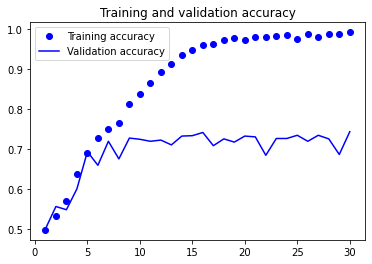

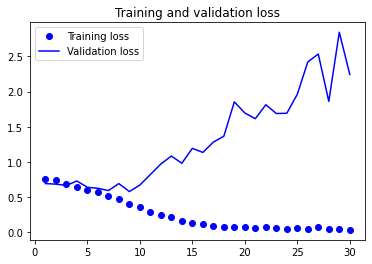

In [70]:
# 훈련 과정의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [80]:
# 테스트 세트에서 모델 평가하기
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 7s 200ms/step - loss: 0.6233 - accuracy: 0.7050
Test accuracy: 0.705


In [81]:
# 컨브넷에 추가할 데이터 증식 단계 정의하기
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

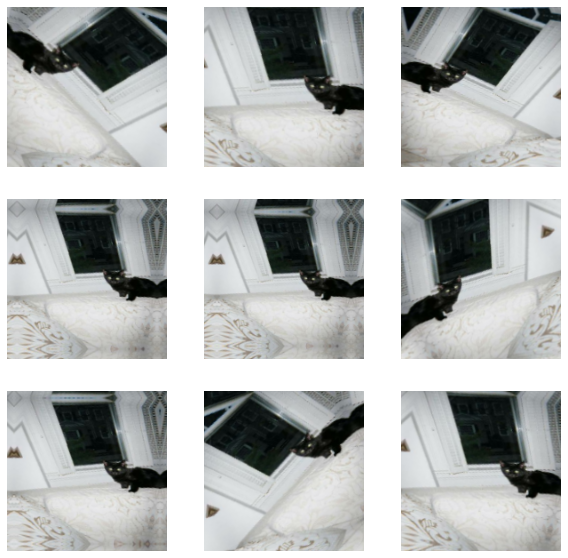

In [82]:
# 랜덤하게 증식된 훈련 이미지 출력하기
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# 사전 훈련된 모델을 사요한 특성 추출하기

```
방법1 FC(풀리컨넥티드)만 사용하기 : 빠른 특성추출
방법2 Conv층 일부 사용하기 : 미세조정(Fine Tuning)
```

## 방법1. FC만 사용하기

In [75]:
# VGG16 합성곱 기반 층 만드릭
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,  ## 풀리 컨넥티드 안한다는 뜻
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [77]:
conv_base.summary()  ## 그림 참고(CNN구조의 feature, VGG16)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

학습된걸 가져왔기 때문에 predict를 할 수 있다.

In [83]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 1s 523ms/step


In [84]:
train_features.shape

(2000, 5, 5, 512)

In [85]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(train_features, train_labels,
                    epochs=20,
                    validation_data=(val_features, val_labels),
                    callbacks=callbacks) 

Epoch 1/20
63/63 [==============================] - 4s 51ms/step - loss: 24.6857 - accuracy: 0.9170 - val_loss: 3.4048 - val_accuracy: 0.9730
Epoch 2/20
63/63 [==============================] - 3s 45ms/step - loss: 3.4052 - accuracy: 0.9755 - val_loss: 7.1832 - val_accuracy: 0.9610
Epoch 3/20
63/63 [==============================] - 3s 46ms/step - loss: 1.8019 - accuracy: 0.9880 - val_loss: 4.7931 - val_accuracy: 0.9740
Epoch 4/20
63/63 [==============================] - 3s 45ms/step - loss: 1.9083 - accuracy: 0.9880 - val_loss: 3.7799 - val_accuracy: 0.9760
Epoch 5/20
63/63 [==============================] - 3s 45ms/step - loss: 1.2937 - accuracy: 0.9910 - val_loss: 6.2164 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 3s 46ms/step - loss: 1.1418 - accuracy: 0.9895 - val_loss: 6.8828 - val_accuracy: 0.9730
Epoch 7/20
63/63 [==============================] - 3s 46ms/step - loss: 0.7783 - accuracy: 0.9940 - val_loss: 5.3004 - val_accuracy: 0.9730
Epoch 8/20
6

In [ ]:
이전에 30분 걸렸던것 보다 빨리 출력이 되었다.
이유는 콘브 조작은 하나도 안하고 곤브 조작에 의한 결과물들을 가지고 분류만 한 것이다.
featureExtraction은 하나도 안하고 훈련된 데이터만 가져왔다.

In [ ]:
콜백에 feature_extraction.keras이 저장되어 있다.
이걸 불러다가 testset을 이용하여 accuracy를 확인해보기

In [89]:
# 테스트 세트에서 모델 평가하기
test_model1 = keras.models.load_model("feature_extraction.keras")
test_losss, test_accc = test_model1.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accc:.3f}")

32/32 [==============================] - 0s 4ms/step - loss: 4.9130 - accuracy: 0.9660
Test accuracy: 0.966


In [ ]:
프리트레인드 모델을 가져다가 내 데이터를 집어넣어서 분류를 한 것이다.
직접 만든것보다 성능이 훨씬 좋다.
결과물들만 모아서 (fetures) 풀리 컨넥티드에 넣은것이다.

## 방법2. Conv층 일부 사용하기
: 전의 층의 가중치는 나두고 하나의 층만 조정하기

In [92]:
# VGG16 합성곱 기반 층을 만들고 동결하기
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False)
conv_base.trainable = False  ## 동결

In [93]:
len(conv_base.trainable_weights)

0

In [95]:
# 데이터 증식 단계와 밀집 분류기를 합성곱 기반 층에 추가하기
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [96]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 192s 3s/step - loss: 20.1850 - accuracy: 0.8940 - val_loss: 4.9094 - val_accuracy: 0.9670
Epoch 2/50
63/63 [==============================] - 176s 3s/step - loss: 6.2800 - accuracy: 0.9415 - val_loss: 4.8132 - val_accuracy: 0.9660
Epoch 3/50
63/63 [==============================] - 183s 3s/step - loss: 4.5182 - accuracy: 0.9620 - val_loss: 2.5836 - val_accuracy: 0.9760
Epoch 4/50
63/63 [==============================] - 183s 3s/step - loss: 4.9410 - accuracy: 0.9570 - val_loss: 4.0940 - val_accuracy: 0.9740
Epoch 5/50
63/63 [==============================] - 189s 3s/step - loss: 3.8174 - accuracy: 0.9670 - val_loss: 4.1041 - val_accuracy: 0.9760
Epoch 6/50
63/63 [==============================] - 185s 3s/step - loss: 2.2445 - accuracy: 0.9780 - val_loss: 4.0657 - val_accuracy: 0.9780
Epoch 7/50
63/63 [==============================] - 185s 3s/step - loss: 2.2730 - accuracy: 0.9775 - val_loss: 2.6679 - val_accuracy: 0.9810
Epoch 8/50
6

In [97]:
# 4단계: 기반 네트워크에서 일부 층의 동결을 해제합니다.
# 마지막에서 네 번째 층까지 모든 층 동결하기
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [109]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
19/63 [========>.....................] - ETA: 1:35 - loss: 4.5210 - accuracy: 0.9688


KeyboardInterrupt



In [ ]:
# 테스트 데이터에서 모델 평가
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")